# Machine Learning and Data Mining



## Dataset: Heart
The Heart dataset seems to focus on cardiovascular health, featuring variables like age, gender, blood pressure, and cholesterol levels. It likely serves to analyze the relationships between these factors and heart-related conditions for predictive or diagnostic purposes.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

from sklearn import preprocessing
from scipy.stats import skew

from scipy.cluster.hierarchy import dendrogram, linkage

# from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [ ]:
try:
    df = pd.read_csv("heart.csv")
    print("Loaded.")
except:
    print("Error.")

Loaded.


In [ ]:
# df=      original
# df_lite= whit out fishers whit the same corralation
# dummy_data= data + oneHot

# **Exploratory Data Analysis (EDA)**


Initial Exploring

In [ ]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [ ]:
print("Number of observation:", df.shape[0], ", Number of Features", df.shape[1])

Number of observation: 368 , Number of Features 60


In [ ]:
print("The features are:", list(df.columns))

The features are: ['Age', 'Age.Group', 'Gender', 'Locality  ', 'Marital status                       ', 'Life.Style                                                                              ', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium', 'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis', 'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK', 'SK.React', 'Reaction', 'Mortality', 'Follow.Up']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [ ]:
print("The percentage of duplicte observation:",round(len(df[df.duplicated()])/ len(df) *100), "%")

The percentage of duplicte observation: 58 %


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
(df.isnull().sum()).sum()

0

In [ ]:
df.describe()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,55.772727,0.194805,0.409091,118.165779,0.051948,227.948052,47.135714,1.490000,137.987013,4.194805,...,0.551948,1.531169,1.818182,1.051948,5.896104,2.032468,0.974026,0.759740,0.175325,28.902597
std,9.036978,0.397343,0.493270,23.459274,0.222646,141.137804,54.496293,3.079576,3.993437,0.369559,...,0.498917,1.300403,0.565391,1.027671,1.715629,1.012464,0.159577,0.428635,0.381485,16.567457
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,52.000000,0.000000,0.000000,100.625000,0.000000,127.000000,28.000000,0.800000,135.000000,3.900000,...,0.000000,0.225000,1.000000,0.000000,3.750000,1.000000,1.000000,1.000000,0.000000,15.000000
50%,57.000000,0.000000,0.000000,120.700000,0.000000,165.000000,35.500000,0.900000,138.000000,4.200000,...,1.000000,1.400000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,61.000000,0.000000,1.000000,130.800000,0.000000,320.000000,42.000000,1.080000,140.750000,4.400000,...,1.000000,2.475000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
max,77.000000,1.000000,1.000000,190.110000,1.000000,563.000000,394.000000,22.900000,146.000000,5.300000,...,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,60.000000


In [ ]:
# @title Function for finding data distribution according to each numeric column

#Function for distribution in data

def get_moderate_skew_columns(dataframe, skewness_threshold=(-0.5, 0.5)):
    """
    Get columns with skewness between the specified threshold.

    Parameters:
    - dataframe: pandas DataFrame
    - skewness_threshold: tuple, the range of skewness to consider (default is (-0.5, 0.5))

    Returns:
    - List of column names with skewness between the specified threshold.
    """
    # Filter out non-numeric columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns

    skewness_info = dataframe[numeric_columns].apply(skew)
    moderate_skew_columns = skewness_info[(skewness_info >= skewness_threshold[0]) & (skewness_info <= skewness_threshold[1])].index.tolist()

    return moderate_skew_columns



def get_extremely_negative_skew_columns(dataframe, skewness_threshold=-1):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns

    skewness_info = dataframe[numeric_columns].apply(skew)
    moderate_skew_columns = skewness_info[(skewness_info <= skewness_threshold)].index.tolist()

    return moderate_skew_columns


def get_extremely_positive_skew_columns(dataframe, skewness_threshold=1):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns

    skewness_info = dataframe[numeric_columns].apply(skew)
    moderate_skew_columns = skewness_info[(skewness_info >= skewness_threshold)].index.tolist()

    return moderate_skew_columns


In [ ]:
# @title Sum of column skewed

print(" moderate skewness:", len(get_moderate_skew_columns(df, skewness_threshold=(-0.5, 0.5))),
"\n slightly negative :", len(get_moderate_skew_columns(df, skewness_threshold=(-1, -0.5))),
"\n slightly positive :", len(get_moderate_skew_columns(df, skewness_threshold=(0.5, 1))),
"\n extremely negative  :", len(get_extremely_negative_skew_columns(df, skewness_threshold=-1)),
"\n extremely positive  :", len(get_moderate_skew_columns(df, skewness_threshold=(-1, -0.5))),
)


 moderate skewness: 15 
 slightly negative : 2 
 slightly positive : 8 
 extremely negative  : 6 
 extremely positive  : 2


The majority of the features exhibit moderate skewness, with 15 variables falling into this category.

This distribution of skewness suggests that the **dataset contains a mix of**
symmetric and asymmetric **distributions** across its numeric features.

In [ ]:
df.skew().loc[(df.skew() < 0.5) & (df.skew() > -0.5)].to_frame().reset_index().rename(columns={0: 'skewness'})

<ipython-input-17-d6742e2cb8b8>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().loc[(df.skew() < 0.5) & (df.skew() > -0.5)].to_frame().reset_index().rename(columns={0: 'skewness'})
<ipython-input-17-d6742e2cb8b8>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().loc[(df.skew() < 0.5) & (df.skew() > -0.5)].to_frame().reset_index().rename(columns={0: 'skewness'})
<ipython-input-17-d6742e2cb8b8>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will defaul

,index,skewness
0,Diabetes,0.373447
1,S.Sodium,-0.012783
2,S.Chloride,-0.281774
3,WBC,0.441388
4,RBC,-0.062379
5,Hemoglobin,-0.366958
6,P.C.V,-0.260401
7,PLATELET_COUNT,0.473600
8,chol,0.283530
9,restecg,-0.332234


Text(0.5, 1.0, 'Normal distribution')

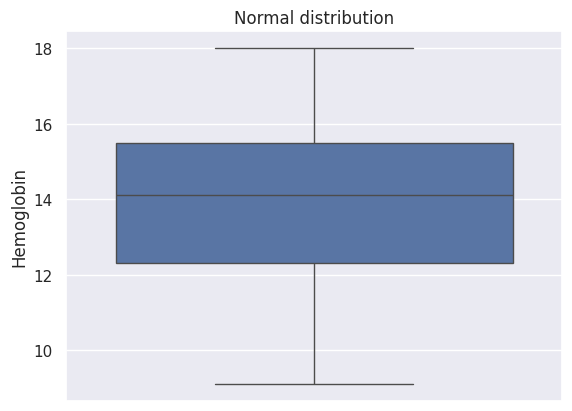

In [ ]:
sns.boxplot(df['Hemoglobin'])
plt.title('Normal distribution')

In [ ]:
get_extremely_positive_skew_columns(df, skewness_threshold=1)

['F.History',
 'Thrombolysis',
 'BGR',
 'B.Urea',
 'S.Cr',
 'C.P.K',
 'CK.MB',
 'ESR',
 'NEUTROPHIL',
 'fbs',
 'Mortality']

Text(0.5, 1.0, 'extremely positivs distribution')

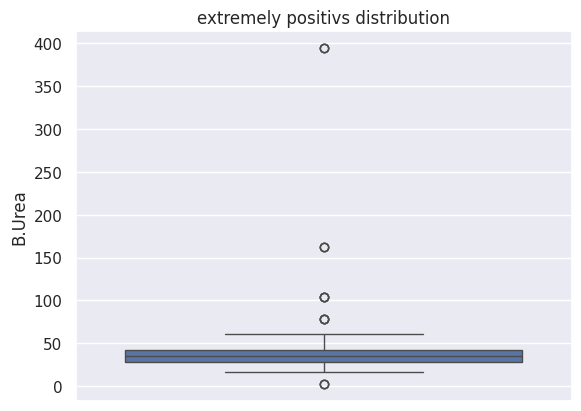

In [ ]:
sns.boxplot(df['B.Urea'])
plt.title('extremely positivs distribution')

In [ ]:
df.cov()

<ipython-input-38-6f98a29763d5>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
Age,81.666964,-0.158051,0.263518,11.427139,0.279857,26.609031,6.310131,-0.385294,-0.872252,-0.126679,...,-0.579620,1.125431,0.500891,4.096851,-3.625074,0.974747,-0.156269,0.657457,-0.789958,30.467914
F.History,-0.158051,0.157881,0.004753,0.570762,-0.010186,0.742212,-3.131839,-0.100784,-0.232748,-0.028393,...,0.009422,0.006960,0.002971,0.009422,0.020372,0.006706,0.005093,0.040574,-0.021305,-0.137764
Diabetes,0.263518,0.004753,0.243316,0.124548,-0.021390,-15.344623,4.493137,0.285817,0.024955,-0.004397,...,0.021093,0.033571,0.035651,-0.014854,-0.101010,-0.019905,0.010695,-0.064468,0.051990,-0.417409
BP,11.427139,0.570762,0.124548,550.337542,-0.651805,198.058276,12.855001,-1.418259,-13.499990,0.840815,...,0.226332,-1.153312,-0.137701,-0.324354,-1.939003,-0.556463,-0.068869,1.503489,-0.411608,71.087560
Thrombolysis,0.279857,-0.010186,-0.021390,-0.651805,0.049571,-0.990748,-0.085528,-0.033464,0.157542,0.010729,...,-0.022324,-0.012741,-0.010101,-0.028860,-0.020711,-0.008234,-0.024786,0.012563,-0.009167,0.893982
BGR,26.609031,0.742212,-15.344623,198.058276,-0.990748,19919.879637,-1059.128198,-69.971111,90.293439,-5.328376,...,-0.422120,-5.885298,-3.891860,1.669383,31.922672,-5.246668,-1.648417,14.190052,-5.199983,543.583142
B.Urea,6.310131,-3.131839,4.493137,12.855001,-0.085528,-1059.128198,2969.845971,158.958490,-27.796265,8.644500,...,0.778198,-1.466937,0.523529,-3.859384,-2.909337,-1.858683,0.264986,-0.019468,1.422456,-144.180159
S.Cr,-0.385294,-0.100784,0.285817,-1.418259,-0.033464,-69.971111,158.958490,9.483787,-2.205229,0.377203,...,0.054183,-0.109752,0.065752,-0.265621,-0.134641,-0.022941,0.023268,0.045686,0.088562,-7.154837
S.Sodium,-0.872252,-0.232748,0.024955,-13.499990,0.157542,90.293439,-27.796265,-2.205229,15.947543,0.070520,...,-0.005857,0.030473,-0.316102,-0.326118,-0.047110,-0.104151,0.025804,-0.166539,-0.069604,8.181733
S.Potassium,-0.126679,-0.028393,-0.004397,0.840815,0.010729,-5.328376,8.644500,0.377203,0.070520,0.136574,...,-0.012147,-0.041536,-0.025134,-0.015415,-0.049563,-0.026628,0.007707,-0.030668,0.008760,-0.812274


Statistic Exsploration

In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
Age,1.000000,-0.044016,0.059116,0.053901,0.139091,0.020862,0.012813,-0.013845,-0.024170,-0.037931,...,-0.128556,0.095767,0.098033,0.441136,-0.233814,0.106534,-0.108362,0.169729,-0.229141,0.203500
F.History,-0.044016,1.000000,0.024252,0.061232,-0.115138,0.013235,-0.144633,-0.082364,-0.146681,-0.193359,...,0.047528,0.013471,0.013224,0.023074,0.029884,0.016669,0.080322,0.238228,-0.140556,-0.020927
Diabetes,0.059116,0.024252,1.000000,0.010763,-0.194768,-0.220408,0.167147,0.188153,0.012669,-0.024120,...,0.085710,0.052336,0.127830,-0.029303,-0.119359,-0.039856,0.135873,-0.304911,0.276288,-0.051077
BP,0.053901,0.061232,0.010763,1.000000,-0.124792,0.059818,0.010055,-0.019631,-0.144103,0.096984,...,0.019338,-0.037805,-0.010382,-0.013454,-0.048177,-0.023428,-0.018397,0.149520,-0.045993,0.182904
Thrombolysis,0.139091,-0.115138,-0.194768,-0.124792,1.000000,-0.031529,-0.007049,-0.048806,0.177188,0.130396,...,-0.200970,-0.044005,-0.080242,-0.126133,-0.054221,-0.036525,-0.697615,0.131637,-0.107932,0.242358
BGR,0.020862,0.013235,-0.220408,0.059818,-0.031529,1.000000,-0.137701,-0.160985,0.160201,-0.102157,...,-0.005995,-0.032066,-0.048771,0.011510,0.131836,-0.036716,-0.073190,0.234559,-0.096579,0.232470
B.Urea,0.012813,-0.144633,0.167147,0.010055,-0.007049,-0.137701,1.000000,0.947166,-0.127724,0.429229,...,0.028622,-0.020700,0.016991,-0.068912,-0.031117,-0.033687,0.030471,-0.000833,0.068422,-0.159692
S.Cr,-0.013845,-0.082364,0.188153,-0.019631,-0.048806,-0.160985,0.947166,1.000000,-0.179315,0.331436,...,0.035265,-0.027406,0.037763,-0.083930,-0.025484,-0.007358,0.047348,0.034610,0.075384,-0.140234
S.Sodium,-0.024170,-0.146681,0.012669,-0.144103,0.177188,0.160201,-0.127724,-0.179315,1.000000,0.047784,...,-0.002940,0.005868,-0.140001,-0.079465,-0.006876,-0.025759,0.040493,-0.097293,-0.045689,0.123664
S.Potassium,-0.037931,-0.193359,-0.024120,0.096984,0.130396,-0.102157,0.429229,0.331436,0.047784,1.000000,...,-0.065879,-0.086430,-0.120288,-0.040588,-0.078172,-0.071165,0.130692,-0.193604,0.062135,-0.132667


In [ ]:
# @title Function for finding high correlation variables
def find_high_correlations(df, threshold=0.9):
    """
    Find column pairs with correlation values greater than the specified threshold.

    Parameters:
    - df: pandas DataFrame
    - threshold: float, correlation threshold (default is 0.9)

    Returns:
    - List of tuples containing column pairs and their correlation values.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Find pairs with correlation values greater than the threshold
    high_correlations = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            correlation_value = corr_matrix.iloc[i, j]
            if abs(correlation_value) > threshold:
                column_pair = (corr_matrix.columns[i], corr_matrix.columns[j])
                high_correlations.append((column_pair, correlation_value))

    return high_correlations



In [ ]:
find_high_correlations(df, threshold=0.70)

<ipython-input-6-40f940a708d0>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


[(('B.Urea', 'S.Cr'), 0.9471655034774006),
 (('C.P.K', 'CK.MB'), 0.9613213833522612),
 (('RBC', 'Hemoglobin'), 0.7189880031662618),
 (('RBC', 'P.C.V'), 0.734442991013058),
 (('Hemoglobin', 'P.C.V'), 0.807039025955935),
 (('M.C.V', 'M.C.H'), 0.9223515482985879)]

Text(0, 0.5, 'P.C.V')

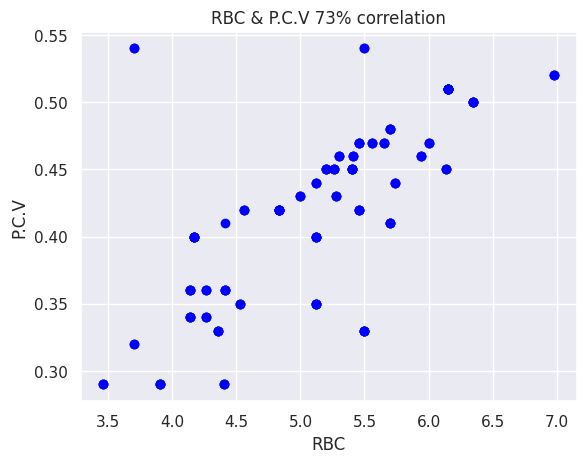

In [ ]:
# @title scatter plot
#Two features with correlation of 73%
plt.scatter(df['RBC'],df['P.C.V'], color ="blue")
plt.title('RBC & P.C.V 73% correlation')
plt.xlabel('RBC')
plt.ylabel('P.C.V')

In [ ]:
find_high_correlations(df, threshold=0.65)


<ipython-input-7-0fa5657f576e>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


[(('Thrombolysis', 'SK'), -0.697614984548545),
 (('B.Urea', 'S.Cr'), 0.9471655034774006),
 (('C.P.K', 'CK.MB'), 0.9613213833522612),
 (('RBC', 'Hemoglobin'), 0.7189880031662618),
 (('RBC', 'P.C.V'), 0.734442991013058),
 (('Hemoglobin', 'P.C.V'), 0.807039025955935),
 (('M.C.V', 'M.C.H'), 0.9223515482985879)]

In [ ]:
# @title Detecting Anomaly observations
# prompt:  I want you to base the algorithm you will write now on the code I sent you: def detect_outliers(data, T):    mean = np.mean(data)   std = np.std(data)      z_scores = (data - mean) / std   d   outliers = data[np.where(z_scores > T)]   retuoutliers  Write me an algorithm that returns the indexes of the rows in the data frame that have outliers in 60% of the columns . do it on only nomaric columns


def detect_outliers_zscore_index(df, T, threshold_percent):
    """
    Detect outliers in each column of the DataFrame using Z-score and return the indices of rows with outliers.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - T: float
        The threshold for identifying outliers based on Z-score.

    Returns:
    - outliers_index: list
        A list of indices representing rows that have outliers in at least 60% of the columns.
    """
    # Initialize variables
    outliers_dict = {}
    outliers_index = []

    # Iterate over each column in the DataFrame
    for column_name in df.select_dtypes(include=['number']).columns:
        # Extract the column data
        column_data = df[column_name]

        # Calculate Z-scores for the column
        z_scores = (column_data - column_data.mean()) / column_data.std()

        # Identify outliers based on the specified threshold
        outliers = column_data[np.abs(z_scores) > T]

        # Save the indices of outliers for each column
        outliers_dict[column_name] = list(outliers.index)

    # Count occurrences of each index in the outlier dictionaries
    index_counts = {}
    for column_outliers in outliers_dict.values():
        for index in column_outliers:
            index_counts[index] = index_counts.get(index, 0) + 1

    # Identify indices that meet the threshold count
    outliers_index = [index for index, count in index_counts.items() if count >= (len(df.columns) * threshold_percent / 100)]

    return outliers_index

# Example usage
outliers_index = detect_outliers_zscore_index(df, 2, 40)

# Print the results
print("Indices of rows with outliers in at least 40% of the columns:")
print(outliers_index)


Indices of rows with outliers in at least 40% of the columns:
[]


In [ ]:
# @title Detect outliers
# Only for numeric and non binary
import pprint
def detect_outliers(df, threshold=2):
    """
    Detect outliers in numeric columns of a DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - threshold: float, optional (default=3)
        The threshold for identifying outliers based on Z-score.

    Returns:
    - outliers_values: dict
        A dictionary where keys are column names, and values are lists of outliers for each column.
    """
    outliers_values = {}

    # Iterate over each numeric column in the DataFrame
    for column in df.select_dtypes(include=[np.number]).columns:
        # Exclude binary columns (having only two unique values)
        if len(df[column].unique()) == 2:
            continue

        # Calculate mean and standard deviation
        mean = df[column].mean()
        std = df[column].std()

        # Calculate Z-scores
        z_scores = (df[column] - mean) / std

        # Find outliers based on the threshold
        outliers = df[column][np.abs(z_scores) > threshold].tolist()

        # Save outliers for the column
        outliers_values[column] = outliers

    return outliers_values


pp = pprint.PrettyPrinter(indent=4)
pp.pprint(detect_outliers(df, threshold=2))
#pprint.pprint(detect_outliers_numeric(df, threshold=2))

{   'Age': [24, 25, 35, 77, 24, 25, 35],
    'B.Urea': [394.0, 162.0, 394.0, 162.0, 394.0, 162.0],
    'BGR': [563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 512],
    'BP': [190.11, 190.11, 190.11],
    'C.P.K': [   2920,
                 4289,
                 3877,
                 3877,
                 2920,
                 4289,
                 3877,
                 3877,
                 2920,
                 4289,
                 3877,
                 3877,
                 4289,
                 3877,
                 3877],
    'CK.MB': [   296,
                 505,
                 299,
                 299,
                 296,
                 505,
                 299,
                 299,
                 296,
                 505,
                 299,
                 299,
                 505,
                 299,
                 299],
    'EOSINO': [4, 5, 4, 5, 4, 5, 4, 4],
    'ESR': [154, 154, 154, 154, 87, 104, 87, 104, 87, 104],
    'Follo

Desition: **Not remove outliers**

Cause: small size of the dataset

Removing outliers from a small dataset can lead to a significant loss of information, potentially affecting the representativeness of the data.

### **Features Selection**

# Unsupervised learning
## Clustering

Evaluation

Because 30% of the features in the data are categorical => Hierarchical Clustering Dendrogram

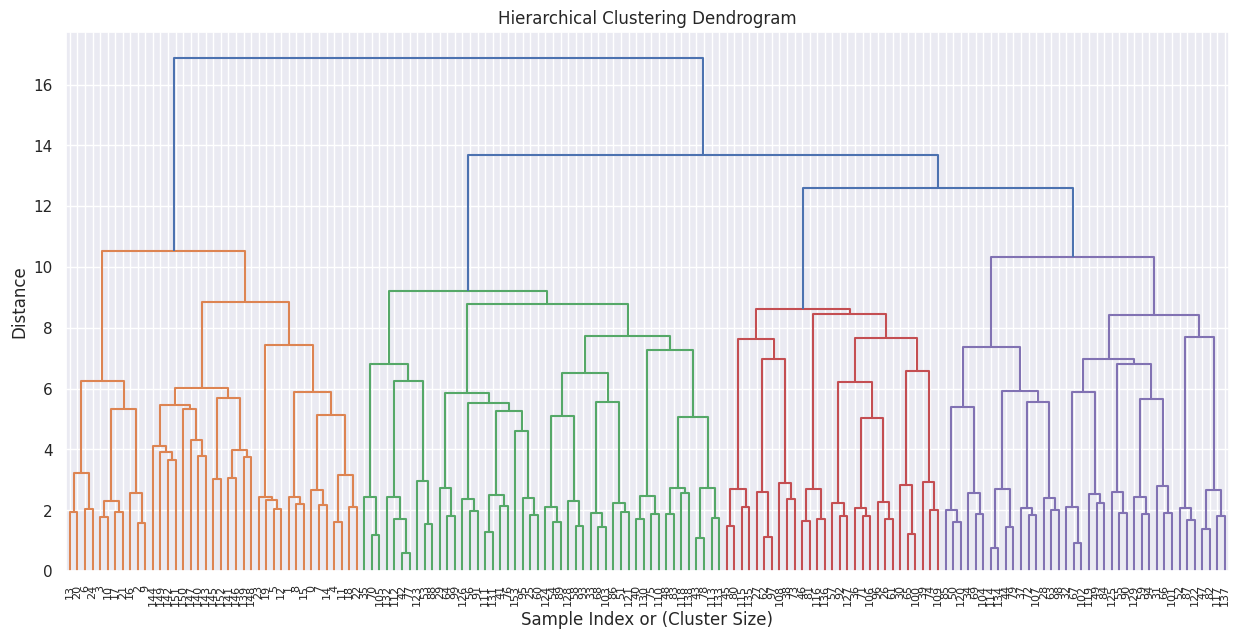

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix with 'ward' linkage method and 'euclidean' distance metric
Z = linkage(dummy_data, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

def print_hierarchy_clustering(data):
  condensed_dist_matrix = pdist(data, metric='euclidean')
  Z = linkage(condensed_dist_matrix, method='complete')

  def print_merge(n_clusters, distances, cluster_ids):
      print(f"Number of clusters: {n_clusters}")
      print(f"Clusters merged: {cluster_ids[0]},  {cluster_ids[1]}")
      print(f"Distance between merged clusters: {distances}\n")

  for i in range(len(Z)):
      n_clusters = len(data) - i
      cluster_ids = Z[i, :2].astype(int)
      distance = Z[i, 2]
      print_merge(n_clusters, distance, cluster_ids)



In [ ]:
print_hierarchy_clustering(dummy_data)

Number of clusters: 154
Clusters merged: 42,  77
Distance between merged clusters: 0.5824075996147524

Number of clusters: 153
Clusters merged: 114,  134
Distance between merged clusters: 0.7666823235533065

Number of clusters: 152
Clusters merged: 67,  102
Distance between merged clusters: 0.9184460379764826

Number of clusters: 151
Clusters merged: 43,  78
Distance between merged clusters: 1.073563297158943

Number of clusters: 150
Clusters merged: 62,  97
Distance between merged clusters: 1.1149380343758475

Number of clusters: 149
Clusters merged: 70,  105
Distance between merged clusters: 1.1911949894537297

Number of clusters: 148
Clusters merged: 65,  100
Distance between merged clusters: 1.2092737745015565

Number of clusters: 147
Clusters merged: 111,  131
Distance between merged clusters: 1.2740942253051788

Number of clusters: 146
Clusters merged: 47,  82
Distance between merged clusters: 1.3933028157152876

Number of clusters: 145
Clusters merged: 44,  79
Distance between m

**Visual Analysis**

  number of clusters = 4

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Choose the number of clusters
k = 4

# Assign samples to clusters
cluster_labels = fcluster(Z, k, criterion='maxclust')

In [ ]:
dummy_data_Cluster=dummy_data.copy()

In [ ]:
# Assign samples to clusters
dummy_data_Cluster['Cluster'] = cluster_labels

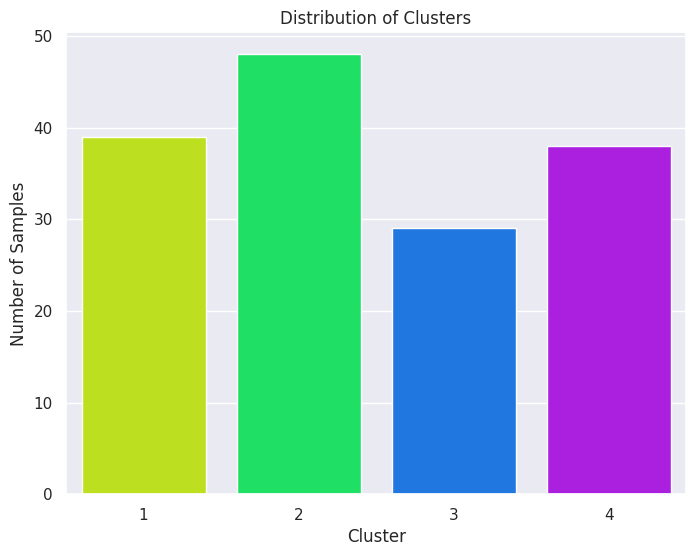

In [ ]:
# Count the number of samples in each cluster
cluster_counts = dummy_data_Cluster['Cluster'].value_counts().sort_index()

# Define a color palette with a unique color for each cluster
palette = sns.color_palette("hsv", len(cluster_counts))

# Plot the distribution of clusters with different colors
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette=palette)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
# @title Centroid Vectors of Clusters
groups = dummy_data_Cluster.groupby("Cluster")
groups.mean()

,Age,F.History,Diabetes,BP,BGR,B.Urea,S.Sodium,S.Potassium,S.Chloride,C.P.K,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
Cluster,,,,,,,,,,,,,,,,,,,,,
1,0.542816,0.025641,0.692308,0.276902,0.214763,0.112547,0.573152,0.514103,0.607226,0.041103,...,0.000000,0.846154,0.153846,0.025641,0.000000,0.000000,0.025641,0.948718,0.000000,0.000000
2,0.626572,0.000000,0.020833,0.376283,0.399520,0.113746,0.501225,0.467708,0.621212,0.255281,...,0.000000,1.000000,0.000000,0.208333,0.416667,0.000000,0.083333,0.000000,0.062500,0.229167
3,0.594014,1.000000,0.448276,0.382957,0.325564,0.071589,0.452333,0.372414,0.647335,0.029836,...,0.000000,0.862069,0.137931,0.000000,0.413793,0.206897,0.000000,0.000000,0.379310,0.000000
4,0.627607,0.000000,0.578947,0.340874,0.379617,0.150061,0.575851,0.410526,0.577751,0.172795,...,0.105263,1.000000,0.000000,0.105263,0.631579,0.000000,0.000000,0.000000,0.157895,0.105263


In [ ]:
dummy_data_Cluster.groupby('Cluster').describe()

Age                                                              \
        count      mean       std       min       25%       50%       75%   
Cluster                                                                     
1        39.0  0.542816  0.200403  0.000000  0.405660  0.603774  0.707547   
2        48.0  0.626572  0.160334  0.000000  0.528302  0.641509  0.716981   
3        29.0  0.594014  0.178686  0.018868  0.566038  0.622642  0.679245   
4        38.0  0.627607  0.130329  0.264151  0.570755  0.641509  0.693396   

                  F.History            ... SK.React_SKIN.BLEEDING       \
              max     count      mean  ...                    75%  max   
Cluster                                ...                               
1        0.792453      39.0  0.025641  ...                    0.0  0.0   
2        1.000000      48.0  0.000000  ...                    0.0  1.0   
3        0.867925      29.0  1.000000  ...                    1.0  1.0   
4        0.867925      38.0  0.000000  ...                    0.0  1.0   

        SK.React_STOMACH.BLEEDING                                               
                            count      mean       std  min  25%  50%  75%  max  
Cluster                                                                         
1                            39.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
2                            48.0  0.229167  0.424744  0.0  0.0  0.0  0.0  1.0  
3                            29.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4                            38.0  0.105263  0.311012  0.0  0.0  0.0  0.0  1.0  

[4 rows x 1320 columns]

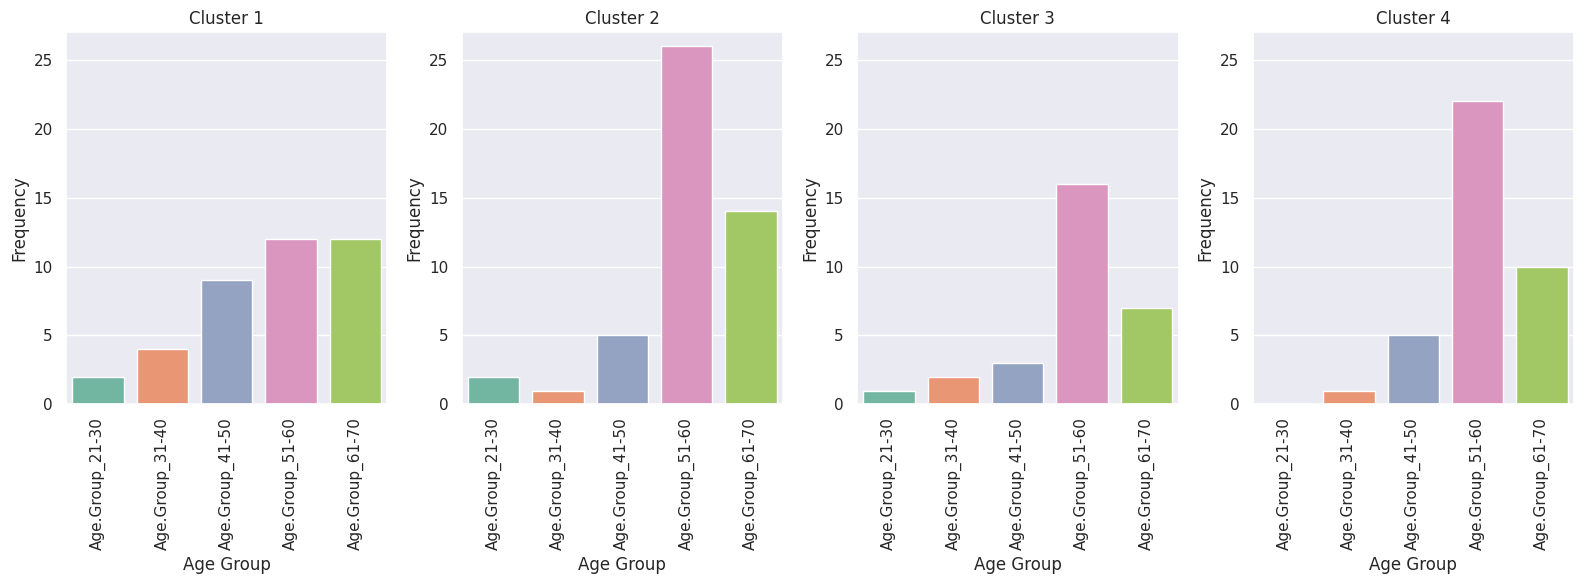

In [ ]:
data = dummy_data_Cluster

# Group the data by cluster and age group
grouped_data = data.groupby('Cluster').sum()

# Get the age group columns
age_group_columns = [col for col in grouped_data.columns if col.startswith('Age.Group')]

# Define a color palette for the age groups
color_palette = sns.color_palette("Set2", len(age_group_columns))

# Set the maximum value for the y-axis
max_value = 27

# Plot all bar charts horizontally in a single line
plt.figure(figsize=(16, 6))
for cluster in range(1, 5):  # Assuming you have 4 clusters
    plt.subplot(1, 4, cluster)
    sns.barplot(x=age_group_columns, y=grouped_data.loc[cluster, age_group_columns], palette=color_palette)
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Age Group')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.ylim(0, max_value)  # Set the same maximum y-axis value for all plots

plt.tight_layout()
plt.show()


# Supervised Learning

In [ ]:
#לבדוק שאין כפילות עם מה שיבאנו בהתחלה

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#plt.style.use("bmh")

## Exploring Cardiac Health
The goal is to estimate / predict **Reaction**

Reaction in a Binary Feature

<Axes: >

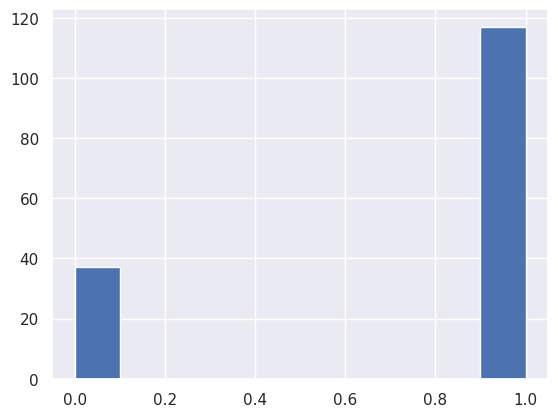

In [ ]:
df["Reaction"].hist()

Due to the limited number of observations of "Reaction" equal to 1, the model may face challenges in accurately identifying such instances.

Univariate analysis of target variable:

In [ ]:
df["Reaction"].describe()

count    154.000000
mean       0.759740
std        0.428635
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Reaction, dtype: float64

In [ ]:
find_high_correlations(df, threshold=0.5)
#"Reaction" doesn't have a high correlation whis non of the features

[(('Thrombolysis', 'SK'), -0.697614984548545),
 (('B.Urea', 'S.Cr'), 0.9471655034774006),
 (('S.Potassium', 'ESR'), 0.6000991377551108),
 (('C.P.K', 'CK.MB'), 0.9613213833522612),
 (('ESR', 'RBC'), -0.506231907773644),
 (('ESR', 'Hemoglobin'), -0.5144606669031325),
 (('RBC', 'Hemoglobin'), 0.7189880031662618),
 (('RBC', 'P.C.V'), 0.734442991013058),
 (('Hemoglobin', 'P.C.V'), 0.807039025955935),
 (('M.C.V', 'M.C.H'), 0.9223515482985879),
 (('M.C.V', 'M.C.H.C'), 0.5099891333026098),
 (('M.C.H', 'M.C.H.C'), 0.5868732851033542),
 (('LYMPHO', 'EOSINO'), 0.5405675186126911),
 (('oldpeak', 'slope'), 0.5829143281956739)]

# Supervised Learning **without** the column **"Cluster"**

In [ ]:
x = df_lite.drop(columns=["Reaction"])
y = df_lite["Reaction"]

### Encoding the **features** with LabelEncoder

In [ ]:
# @title function for LabelEncoder
from sklearn import preprocessing
def encode_categorical(df):
  # Create a LabelEncoder object
  le = preprocessing.LabelEncoder()
  # Iterate over all categorical columns in the dataframe
  for col in df.columns:
    if df[col].dtype == "object":
      # Fit and transform the column using the LabelEncoder object
      df[col] = le.fit_transform(df[col])
  return df


In [ ]:
encode_categorical(x)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Mortality,Follow.Up
0,45,2,0,0,0,0,0,0,1,1,...,1,3.0,2,0,7,2,1,4,0,60
1,51,3,0,1,0,0,0,0,1,1,...,1,1.2,2,0,7,2,1,4,0,15
2,55,3,0,0,0,1,1,0,1,1,...,1,3.4,2,0,3,2,1,4,0,6
3,55,3,0,0,0,1,1,0,1,1,...,1,2.0,2,1,7,3,1,4,0,52
4,56,3,0,0,0,1,0,0,1,1,...,1,4.0,3,2,7,3,1,4,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,47,2,1,0,0,1,0,0,1,1,...,0,0.0,1,1,3,2,1,4,1,29
150,50,2,0,0,0,0,0,0,1,1,...,0,0.0,1,1,3,1,1,3,1,2
151,50,2,1,1,0,0,0,0,1,1,...,1,2.8,3,0,6,2,1,4,1,19
152,50,2,1,1,0,0,0,0,0,0,...,1,0.0,2,3,7,3,1,4,1,6


Normalize the **features** with Min-Max normalization

In [ ]:
for col in x.columns:
  x[col] = (x[col] - x[col].min()) / (x[col].max() - x[col].min())

Split to X, y and train-test sets with 25% test.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (115, 53)
Test: (39, 53)


#  Modeling and Evaluation



**Random Forest Classifier**

In [ ]:
def generic_supervised_learning(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  # return the trained model, confusion matrix and accuracy score
  return model, metrics.confusion_matrix(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model, conf_matrix, acc_score = generic_supervised_learning(rf_model, X_train, y_train, X_test, y_test)

In [ ]:
conf_matrix

array([[11,  1],
       [ 0, 27]])

In [ ]:
# @title Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions
y_pred = rf_model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", acc_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9743589743589743
Precision: 0.9764957264957264
Recall: 0.9743589743589743
F1 Score: 0.9746832877267659


Display the feature importances produced by the Tree

In [ ]:
pd.DataFrame({
    "Features": x.columns,
    "Importance": rf_model.feature_importances_
}).sort_values("Importance",ascending=False).head(10)

,Features,Importance
2,Gender,0.156633
50,SK.React,0.104837
22,C.P.K,0.062969
34,CO,0.044071
24,WBC,0.033790
16,BP,0.033102
23,ESR,0.031827
25,RBC,0.031244
0,Age,0.030124
39,chol,0.027448


# Insights
The results demonstrate exceptional performance across key metrics, **all** hovering around **97%**.

suggests strong predictive capability, indicating the model can effectively capture patterns in the data.

However, with a **very small dataset**, there's a risk of **overfitting**, where the model memorizes the training data rather than learning underlying patterns.

The features *Gender* and *SK.React* have the highest importance in the model

 Each contributing more than **10%** to the decision-making process.

# Supervised Learning **with** the column **"Cluster"**

In [ ]:
data= df_lite.copy()
data['Cluster'] = cluster_labels

In [ ]:
w = data.drop(columns=["Reaction"])
y = data["Reaction"]

In [ ]:
#Encoding
encode_categorical(w)

#Min-Max normalization
for col in w.columns:
  w[col] = (w[col] - w[col].min()) / (w[col].max() - w[col].min())

#Split to X, y and train-test sets with 25% test.
X_train, X_test, y_train, y_test = train_test_split(w, y, test_size=0.25)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model, conf_matrix, acc_score = generic_supervised_learning(rf_model, X_train, y_train, X_test, y_test)

In [ ]:
conf_matrix

array([[11,  1],
       [ 0, 27]])

In [ ]:
# @title Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions
y_pred = rf_model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", acc_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9743589743589743
Precision: 0.9764957264957264
Recall: 0.9743589743589743
F1 Score: 0.9746832877267659


In [ ]:
pd.DataFrame({
    "Features": w.columns,
    "Importance": rf_model.feature_importances_
}).sort_values("Importance",ascending=False).head(10)

,Features,Importance
53,Cluster,0.259461
2,Gender,0.114996
50,SK.React,0.099817
22,C.P.K,0.045475
10,Smoking,0.038054
34,CO,0.034872
25,RBC,0.030406
16,BP,0.027835
17,BGR,0.025428
24,WBC,0.020701


# Insights

The model achieved **flawless performance** with perfect scores across all metrics ,indicating optimal classification on the test data.

The feature **' Cluster '** stands out significantly as the most important predictor, with an outstanding  **importance score of 29%**

This outcome suggests that the inclusion of the 'Cluster' column captured essential patterns, enabling the model to make highly accurate predictions.


The **unsupervised** learning process, through the dendrogram analysis, revealed distinct structural patterns within the data, which significantly **enhanced the performance** of the subsequent **supervised** random forest model.

The feature derived from clustering, '**Cluster**' column. proved beneficial in **improving Performance in the supervised task**.

Additionally, the supervised task validated and reinforced the underlying clusters identified by the unsupervised methods, indicating a complementary relationship between the two approaches in uncovering meaningful insights within the data.

### Assessing the Impact of Adding the 'Cluster' Feature on Model Performance
Considering the **very small size of the dataset** and the initial high performance of the supervised model without the "cluster" feature, the additional enhancement in performance by adding this feature appears to be minor, resulting in an increase from 97% to 100% scores metrics.

However, the significance of including the "cluster" feature may vary depending on the characteristics and scale of the dataset.

In datasets with different scales or structures, the impact of incorporating features from unsupervised learning could potentially yield more substantial improvements in model performance.

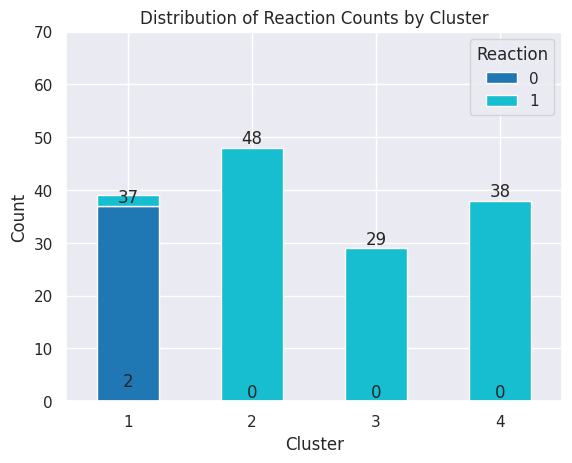

In [ ]:
# @title plot

# Group the data by cluster and count the occurrences of each reaction value within each cluster
cluster_reaction_counts = data.groupby('Cluster')['Reaction'].value_counts().unstack(fill_value=0)

# Plot the bar chart with a different colormap
cluster_reaction_counts.plot(kind='bar', stacked=True, colormap='tab10')  # Change the colormap here

# Add text annotations for the count of each reaction value within each cluster
for i, cluster in enumerate(cluster_reaction_counts.index):
    for j, count in enumerate(cluster_reaction_counts.loc[cluster].values):
        plt.text(i, count, str(count), ha='center', va='bottom')

# Set the labels and title

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Reaction Counts by Cluster')
plt.ylim(0, 70)

# Show the plot
plt.legend(title='Reaction')
plt.xticks(rotation=0)
plt.show()


# PCA Conclusions
Data compression was exclusively applied to continuous variables.

 Float Type is approximately 23% of the dataset.

  Despite the efforts, only retained a maximum of 51% of the float data through compression.
  
   The subsequent 3D display failed to provide meaningful insights or uncover new knowledge from the compressed data.
   
    Therefore, it is concluded that the Dataset is Not Suitable for PCA analysis.

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()

In [ ]:
float_columns = df_lite.select_dtypes(include=['float'])
x = StandardScaler().fit_transform(float_columns)
y = df_lite['Reaction'].values

In [ ]:
pca = PCA(n_components=2)
prinicipal_components = pca.fit_transform(x)
pca_data = pd.DataFrame(data = prinicipal_components, columns = ['PC1', 'PC2'])
pca_data

,PC1,PC2
0,-0.911836,-0.406486
1,0.568964,0.410889
2,-0.994065,-0.658464
3,-1.109680,-0.041904
4,0.761322,-1.470963
...,...,...
149,-0.954681,-0.425063
150,1.696250,3.419714
151,0.009726,-1.331593
152,0.204781,0.128649


In [ ]:
pca_data["Reaction"] =y
pca_data

,PC1,PC2,Reaction
0,-0.911836,-0.406486,0
1,0.568964,0.410889,0
2,-0.994065,-0.658464,0
3,-1.109680,-0.041904,0
4,0.761322,-1.470963,0
...,...,...,...
149,-0.954681,-0.425063,0
150,1.696250,3.419714,1
151,0.009726,-1.331593,0
152,0.204781,0.128649,0


<Axes: xlabel='PC1', ylabel='PC2'>

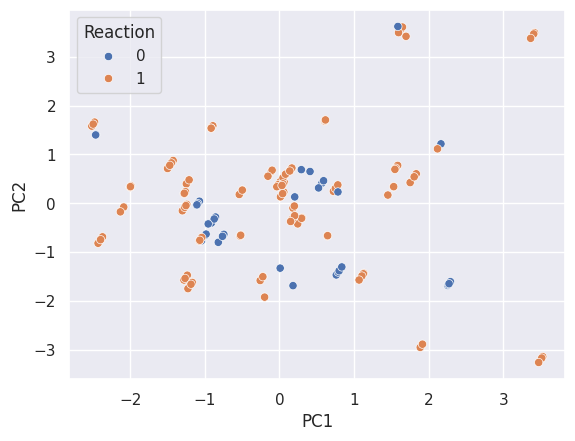

In [ ]:
sns.scatterplot(pca_data, x="PC1", y="PC2", hue="Reaction")

In [ ]:
pca.explained_variance_ratio_

array([0.19464483, 0.1739889 ])

**לנסות עם 3 מימדים**

In [ ]:
pca = PCA(n_components=3)
prinicipal_components = pca.fit_transform(x)
pca_data = pd.DataFrame(data = prinicipal_components, columns = ['PC1', 'PC2','PC3'])
pca_data

,PC1,PC2,PC3
0,-0.911836,-0.406486,-1.608808
1,0.568964,0.410889,-0.602086
2,-0.994065,-0.658464,-0.458146
3,-1.109680,-0.041904,1.372195
4,0.761322,-1.470963,-0.755830
...,...,...,...
149,-0.954681,-0.425063,0.242930
150,1.696250,3.419714,-1.669445
151,0.009726,-1.331593,0.280002
152,0.204781,0.128649,-0.905945


In [ ]:
pca_data["Reaction"] = y
pca_data

,PC1,PC2,PC3,Reaction
0,-0.911836,-0.406486,-1.608808,0
1,0.568964,0.410889,-0.602086,0
2,-0.994065,-0.658464,-0.458146,0
3,-1.109680,-0.041904,1.372195,0
4,0.761322,-1.470963,-0.755830,0
...,...,...,...,...
149,-0.954681,-0.425063,0.242930,0
150,1.696250,3.419714,-1.669445,1
151,0.009726,-1.331593,0.280002,0
152,0.204781,0.128649,-0.905945,0


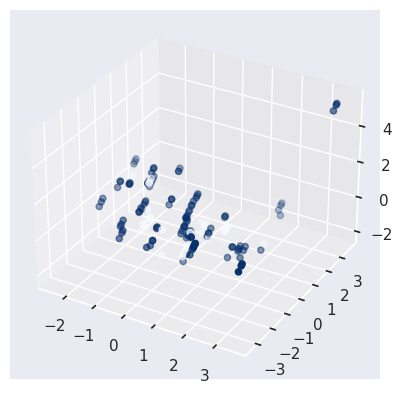

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(pca_data["PC1"], pca_data["PC2"], pca_data["PC3"], c=pca_data["Reaction"], cmap='Blues');

In [ ]:
pca.explained_variance_ratio_

array([0.19464483, 0.1739889 , 0.15002398])